In [10]:
import cv2
import numpy as np

def custom_grayscale(image):
    # Get the dimensions of the image
    height, width, channels = image.shape
    
    # Create an empty grayscale image
    grayscale_image = np.zeros((height, width), dtype=np.uint8)
    
    # Iterate over each pixel in the image
    for y in range(height):
        for x in range(width):
            # Extract the RGB values of the pixel
            r, g, b = image[y, x]
            
            # Calculate the luminance using the formula: Y = 0.299*R + 0.587*G + 0.114*B
            luminance = 0.299 * r + 0.587 * g + 0.114 * b
            
            # Set the pixel value in the grayscale image
            grayscale_image[y, x] = luminance
            
    return grayscale_image

# Load the input image
image = cv2.imread('flower.jpg')

# Convert the image to grayscale using the custom method
gray_image_custom = custom_grayscale(image)

# Display the grayscale image
cv2.imshow('Custom Grayscale', gray_image_custom)
cv2.waitKey(0)
cv2.destroyAllWindows()

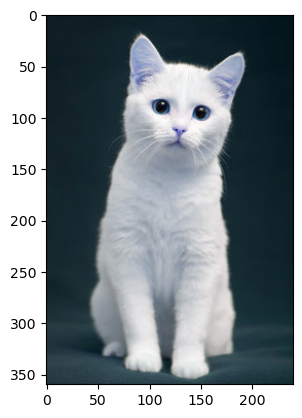

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def custom_resize(image, scale_factor):
    """
    Resize the input image without interpolation.

    Parameters:
        image: numpy.ndarray
            Input image.
        scale_factor: float
            Scaling factor for resizing the image.

    Returns:
        numpy.ndarray
            Resized image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the new dimensions after scaling
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create an empty image to store the resized image
    resized_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Sample the original image at regular intervals
    for y in range(new_height):
        for x in range(new_width):
            # Calculate the corresponding pixel coordinates in the original image
            y_original = int(y / scale_factor)
            x_original = int(x / scale_factor)

            # Assign the pixel value from the original image to the resized image
            resized_image[y, x] = image[y_original, x_original]

    return resized_image

# Load the input image
image = cv2.imread('cat.jpg')

# Define the scale factor
scale_factor = 3.0  # Increase the size by 3 times

# Resize the image using the custom function
custom_resized_image = custom_resize(image, scale_factor)

# Display the original and custom resized images
cv2.imshow('Original Image', image)
cv2.imshow('Custom Resized Image', custom_resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(image)

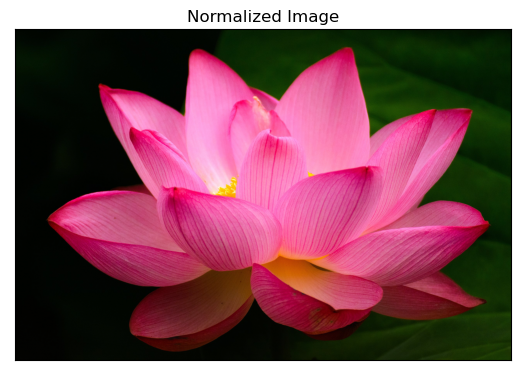

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('lotus.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Calculate the minimum and maximum pixel values for each channel
min_b, max_b = np.min(b), np.max(b)
min_g, max_g = np.min(g), np.max(g)
min_r, max_r = np.min(r), np.max(r)

# Normalize each channel
b_normalized = (b - min_b) / (max_b - min_b)
g_normalized = (g - min_g) / (max_g - min_g)
r_normalized = (r - min_r) / (max_r - min_r)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))

# Display the normalized image
plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()

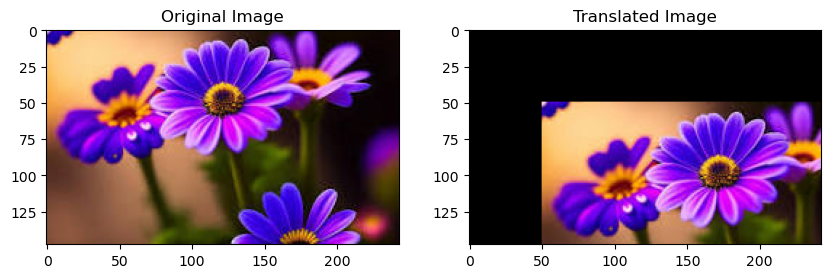

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def translate_image(image, dx, dy):
    """
    Translate the input image by dx pixels in the x-direction and dy pixels in the y-direction.

    Parameters:
        image: numpy.ndarray
            Input image.
        dx: int
            Number of pixels to translate the image in the x-direction.
        dy: int
            Number of pixels to translate the image in the y-direction.

    Returns:
        numpy.ndarray
            Translated image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Create an empty image to store the translated image
    translated_image = np.zeros_like(image)

    # Iterate over each pixel in the translated image
    for y in range(height):
        for x in range(width):
            # Calculate the corresponding pixel coordinates in the original image
            x_original = x - dx
            y_original = y - dy

            # Check if the original pixel coordinates are within the bounds of the original image
            if 0 <= x_original < width and 0 <= y_original < height:
                # Assign the pixel value from the original image to the translated image
                translated_image[y, x] = image[y_original, x_original]

    return translated_image

# Load the input image
image = cv2.imread('flower.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the translation parameters
dx = 50  # Translation in the x-direction
dy = 50  # Translation in the y-direction

# Translate the image using the custom function
translated_image = translate_image(image_rgb, dx, dy)

# Display the original and translated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title('Translated Image')

plt.show()

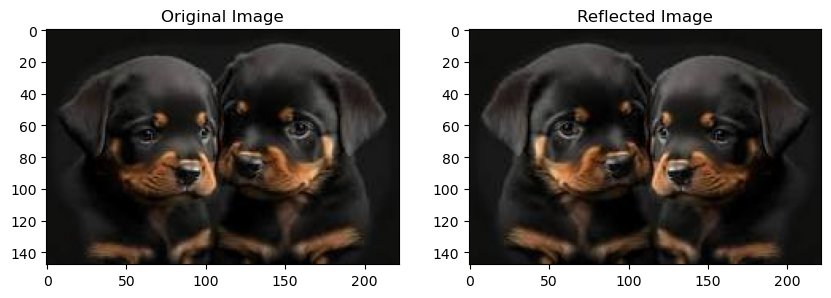

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def reflect_image(image, axis):
    """
    Reflect the input image along the specified axis.

    Parameters:
        image: numpy.ndarray
            Input image.
        axis: int
            Axis along which to reflect the image (0 for vertical reflection, 1 for horizontal reflection).

    Returns:
        numpy.ndarray
            Reflected image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Create an empty image to store the reflected image
    reflected_image = np.zeros_like(image)

    # Perform reflection along the specified axis
    if axis == 0:  # Vertical reflection
        for y in range(height):
            for x in range(width):
                reflected_image[height - y - 1, x] = image[y, x]
    elif axis == 1:  # Horizontal reflection
        for y in range(height):
            for x in range(width):
                reflected_image[y, width - x - 1] = image[y, x]

    return reflected_image

# Load the input image
image = cv2.imread('dog.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the axis of reflection (0 for vertical reflection, 1 for horizontal reflection)
axis = 1  # Horizontal reflection

# Reflect the image using the custom function
reflected_image = reflect_image(image_rgb, axis)

# Display the original and reflected images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reflected_image)
plt.title('Reflected Image')

plt.show()


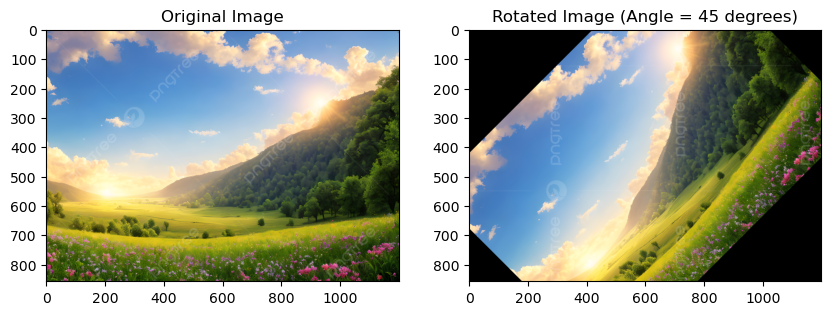

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def rotate_image(image, angle):
    """
    Rotate the input image by the specified angle (in degrees) around its center.

    Parameters:
        image: numpy.ndarray
            Input image.
        angle: float
            Angle of rotation in degrees (positive values for counter-clockwise rotation).

    Returns:
        numpy.ndarray
            Rotated image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Convert the angle from degrees to radians
    theta = math.radians(angle)

    # Calculate the rotation matrix
    rotation_matrix = np.array([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ])

    # Calculate the coordinates of the center of the image
    center_x = width / 2
    center_y = height / 2

    # Create an empty image to store the rotated image
    rotated_image = np.zeros_like(image)

    # Perform rotation by iterating over each pixel in the rotated image
    for y in range(height):
        for x in range(width):
            # Calculate the coordinates of the pixel relative to the center of the image
            x_rel = x - center_x
            y_rel = y - center_y

            # Apply the rotation transformation
            x_rotated, y_rotated = np.dot(rotation_matrix, [x_rel, y_rel])

            # Translate the rotated coordinates back to the original image coordinates
            x_rotated += center_x
            y_rotated += center_y

            # Round the rotated coordinates to the nearest integer
            x_rotated = int(round(x_rotated))
            y_rotated = int(round(y_rotated))

            # Check if the rotated coordinates are within the bounds of the original image
            if 0 <= x_rotated < width and 0 <= y_rotated < height:
                # Assign the pixel value from the original image to the rotated image
                rotated_image[y, x] = image[y_rotated, x_rotated]

    return rotated_image

# Load the input image
image = cv2.imread('nature.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the angle of rotation in degrees (positive values for counter-clockwise rotation)
angle = 45

# Rotate the image using the custom function
rotated_image = rotate_image(image_rgb, angle)

# Display the original and rotated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title('Rotated Image (Angle = {} degrees)'.format(angle))

plt.show()


In [8]:
import cv2
import numpy as np

def scale_image(image, scale_factor):
    """
    Scale the input image by the specified scale factor using bilinear interpolation.

    Parameters:
        image: numpy.ndarray
            Input image.
        scale_factor: float
            Scaling factor for resizing the image.

    Returns:
        numpy.ndarray
            Scaled image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the new dimensions after scaling
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create an empty image to store the scaled image
    scaled_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    # Iterate over each pixel in the scaled image
    for y in range(new_height):
        for x in range(new_width):
            # Calculate the corresponding pixel coordinates in the original image
            x_original = x / scale_factor
            y_original = y / scale_factor

            # Find the integer and fractional parts of the coordinates
            x_int = int(x_original)
            y_int = int(y_original)
            x_frac = x_original - x_int
            y_frac = y_original - y_int

            # Ensure that the coordinates are within the bounds of the original image
            if 0 <= x_int < width - 1 and 0 <= y_int < height - 1:
                # Perform bilinear interpolation
                top_left = image[y_int, x_int] * (1 - x_frac) * (1 - y_frac)
                top_right = image[y_int, x_int + 1] * x_frac * (1 - y_frac)
                bottom_left = image[y_int + 1, x_int] * (1 - x_frac) * y_frac
                bottom_right = image[y_int + 1, x_int + 1] * x_frac * y_frac

                # Assign the interpolated pixel value to the scaled image
                scaled_image[y, x] = top_left + top_right + bottom_left + bottom_right

    return scaled_image

# Load the input image
image = cv2.imread('cat.jpg')

# Define the scale factor
scale_factor = 1.5  # Increase the size by 1.5 times

# Scale the image using the custom function
scaled_image = scale_image(image, scale_factor)

# Display the original and scaled images using cv2.imshow()
cv2.imshow('Original Image', image)
cv2.imshow('Scaled Image', scaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


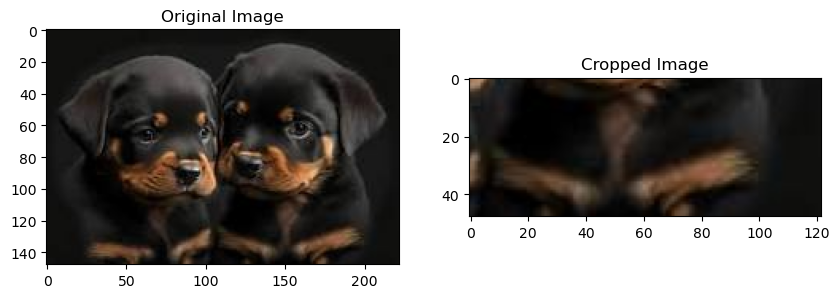

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image(image, x, y, w, h):
    """
    Crop the input image to the specified region of interest (ROI).

    Parameters:
        image: numpy.ndarray
            Input image.
        x: int
            X-coordinate of the top-left corner of the ROI.
        y: int
            Y-coordinate of the top-left corner of the ROI.
        w: int
            Width of the ROI.
        h: int
            Height of the ROI.

    Returns:
        numpy.ndarray
            Cropped image.
    """
    # Extract the region of interest (ROI) from the input image
    cropped_image = image[y:y+h, x:x+w]

    return cropped_image

# Load the input image
image = cv2.imread('dog.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the region of interest (ROI) for cropping
x = 100   # X-coordinate of the top-left corner of the ROI
y = 100   # Y-coordinate of the top-left corner of the ROI
w = 200   # Width of the ROI
h = 200   # Height of the ROI

# Crop the image using the custom function
cropped_image = crop_image(image_rgb, x, y, w, h)

# Display the original and cropped images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cropped_image)
plt.title('Cropped Image')

plt.show()

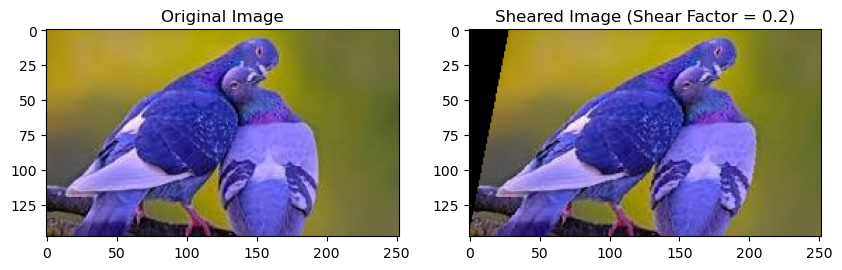

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_x_axis(image, shear_factor):
    """
    Shear the input image in the X-axis by the specified shear factor.

    Parameters:
        image: numpy.ndarray
            Input image.
        shear_factor: float
            Shear factor for shearing the image in the X-axis.

    Returns:
        numpy.ndarray
            Sheared image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the number of pixels to shift each row by
    shift_pixels = int(height * shear_factor)

    # Create an empty image to store the sheared image
    sheared_image = np.zeros_like(image)

    # Iterate over each pixel in the sheared image
    for y in range(height):
        for x in range(width):
            # Calculate the new x-coordinate based on the shear factor
            new_x = x + shift_pixels * (height - y) // height

            # Check if the new x-coordinate is within the bounds of the original image
            if 0 <= new_x < width:
                # Assign the pixel value from the original image to the sheared image
                sheared_image[y, new_x] = image[y, x]

    return sheared_image

# Load the input image
image = cv2.imread('bird.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the shear factor (positive values for rightward shear, negative values for leftward shear)
shear_factor = 0.2

# Shear the image using the custom function
sheared_image = shear_x_axis(image_rgb, shear_factor)

# Display the original and sheared images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared Image (Shear Factor = {})'.format(shear_factor))

plt.show()

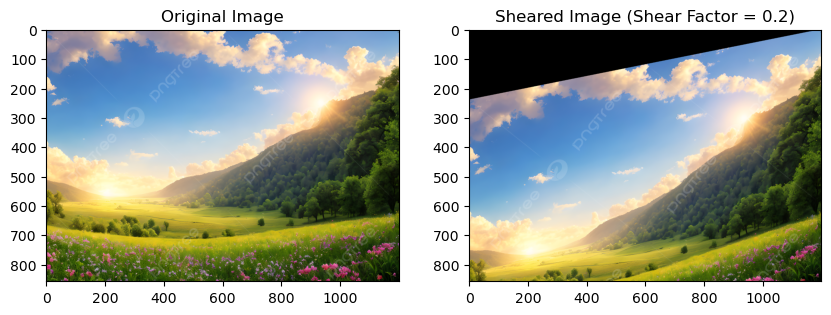

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def shear_y_axis(image, shear_factor):
    """
    Shear the input image in the Y-axis by the specified shear factor.

    Parameters:
        image: numpy.ndarray
            Input image.
        shear_factor: float
            Shear factor for shearing the image in the Y-axis.

    Returns:
        numpy.ndarray
            Sheared image.
    """
    # Get the dimensions of the original image
    height, width, channels = image.shape

    # Calculate the number of pixels to shift each column by
    shift_pixels = int(width * shear_factor)

    # Create an empty image to store the sheared image
    sheared_image = np.zeros_like(image)

    # Iterate over each pixel in the sheared image
    for y in range(height):
        for x in range(width):
            # Calculate the new y-coordinate based on the shear factor
            new_y = y + shift_pixels * (width - x) // width

            # Check if the new y-coordinate is within the bounds of the original image
            if 0 <= new_y < height:
                # Assign the pixel value from the original image to the sheared image
                sheared_image[new_y, x] = image[y, x]

    return sheared_image

# Load the input image
image = cv2.imread('nature.jpg')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the shear factor (positive values for downward shear, negative values for upward shear)
shear_factor = 0.2

# Shear the image using the custom function
sheared_image = shear_y_axis(image_rgb, shear_factor)

# Display the original and sheared images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sheared_image)
plt.title('Sheared Image (Shear Factor = {})'.format(shear_factor))

plt.show()
